In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Question 1

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/penguins.csv')
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## > Perform pre-processing and visualization of the dataset. Perform categorical encoding wherever applicable and split the data into train and test sets

## Preforming Preprocessing on the dataset, encoding and splitiing the dataset

In [ ]:
data.dropna(axis = 0, inplace = True)
data.reset_index(drop = True, inplace = True)
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
329,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
330,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
331,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [ ]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['species'] = encoder.fit_transform(data['species'])
data['island'] = encoder.fit_transform(data['island'])
data['sex'] = encoder.fit_transform(data['sex'])

data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,2,39.1,18.7,181.0,3750.0,1,2007
1,0,2,39.5,17.4,186.0,3800.0,0,2007
2,0,2,40.3,18.0,195.0,3250.0,0,2007
3,0,2,36.7,19.3,193.0,3450.0,0,2007
4,0,2,39.3,20.6,190.0,3650.0,1,2007
...,...,...,...,...,...,...,...,...
328,1,1,55.8,19.8,207.0,4000.0,1,2009
329,1,1,43.5,18.1,202.0,3400.0,0,2009
330,1,1,49.6,18.2,193.0,3775.0,1,2009
331,1,1,50.8,19.0,210.0,4100.0,1,2009


## Visualizing the dataset



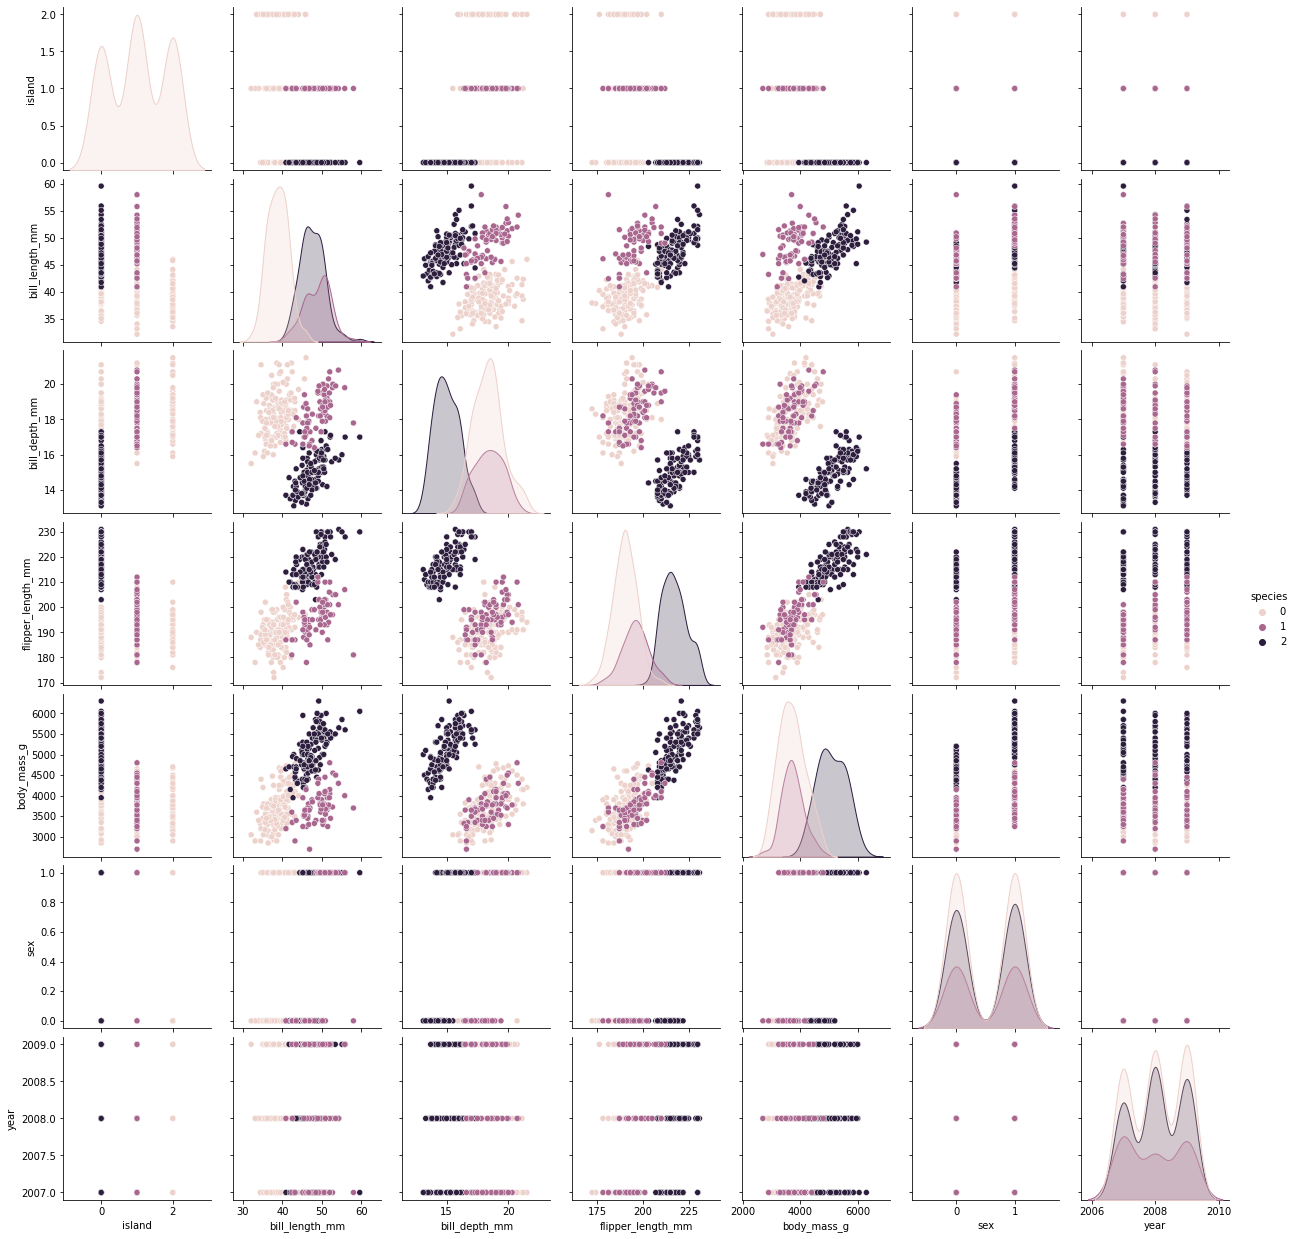

In [ ]:
import seaborn as sns
sns.pairplot(data, hue = 'species')

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(['species'],axis = 1).copy()
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(233, 7) (100, 7) (233,) (100,)


In [ ]:
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,2,39.1,18.7,181.0,3750.0,1,2007
1,0,2,39.5,17.4,186.0,3800.0,0,2007
2,0,2,40.3,18.0,195.0,3250.0,0,2007
3,0,2,36.7,19.3,193.0,3450.0,0,2007
4,0,2,39.3,20.6,190.0,3650.0,1,2007
...,...,...,...,...,...,...,...,...
328,1,1,55.8,19.8,207.0,4000.0,1,2009
329,1,1,43.5,18.1,202.0,3400.0,0,2009
330,1,1,49.6,18.2,193.0,3775.0,1,2009
331,1,1,50.8,19.0,210.0,4100.0,1,2009


##  > Implementing the cost function entropy

In [ ]:
import math
def entropy(dataset):
    values, counts = np.unique(dataset, return_counts=True)
    # print(values,counts)
    probabilities = counts / counts.sum()
    # print(counts.sum())
    # print(probabilities)
    entropy = 0
    for i in probabilities:
        entropy += -(i * math.log2(i)) 
    return entropy

## >Information Gain 

In [ ]:
def information_gain(dataset, split_attribute_name, target_attribute_name):
    total_entropy = entropy(dataset[target_attribute_name])
    
    vals, counts = np.unique(dataset[split_attribute_name], return_counts=True)
    weighted_entropy = 0
    for i in range(len(vals)):
        var = np.unique(dataset[dataset[split_attribute_name] == vals[i]][target_attribute_name])
        weighted_entropy += ((counts[i] / counts.sum()) * entropy(dataset[dataset[split_attribute_name] == vals[i]][target_attribute_name]))
    
    return total_entropy - weighted_entropy

## > Converting continous variables to categorical variables.

In [ ]:
def cont_to_cat(dataset, split_attribute_name, target_attribute_name):
    min_val = dataset[split_attribute_name].min()
    max_val = dataset[split_attribute_name].max()
    L = [x for x in range(int(min_val)+1,int(max_val)+1)]
    # print(L)
    ig = 0
    col = dataset[split_attribute_name]
    ig_list = []
    for i in L:
        new_l = []
        for j in col:
            if j>=i:
                new_l.append(1)
            else:
                new_l.append(0)
        new_l = pd.Series(new_l)
        dataset[split_attribute_name] = new_l
        # print(dataset[split_attribute_name])
        new_ig = information_gain(dataset, split_attribute_name , target_attribute_name)
        ig_list.append((L,new_ig,new_l))
    
    for i in ig_list:
        if i[1] > ig:
            ig = i[1]
            dataset[split_attribute_name] = i[2]
    return

In [ ]:
continous_features = ['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g']

for i in continous_features:
  cont_to_cat(data, i, 'species')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   species            333 non-null    int64
 1   island             333 non-null    int64
 2   bill_length_mm     333 non-null    int64
 3   bill_depth_mm      333 non-null    int64
 4   flipper_length_mm  333 non-null    int64
 5   body_mass_g        333 non-null    int64
 6   sex                333 non-null    int64
 7   year               333 non-null    int64
dtypes: int64(8)
memory usage: 20.9 KB


In [ ]:
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,2,0,1,0,0,1,2007
1,0,2,0,1,0,0,0,2007
2,0,2,0,1,0,0,0,2007
3,0,2,0,1,0,0,0,2007
4,0,2,0,1,0,0,1,2007
...,...,...,...,...,...,...,...,...
328,1,1,1,1,1,0,1,2009
329,1,1,1,1,0,0,0,2009
330,1,1,1,1,0,0,1,2009
331,1,1,1,1,1,0,1,2009


## Decision Tree Class containing train, best split, classification and accuracy methods for the model.

In [ ]:
class DecisionTreeFromScratch:
    def __init__(self, max_depth):
        self.max_depth = max_depth
    
    def fit(self, X, y):
        # Fitting the model
        self.root = self._build_tree(X, y)
    
    def _build_tree(self, X, y, current_depth = 0):
        # Recursively building up the tree

        if len(np.unique(y)) == 1:
            return y.iloc[0]
        
        if len(X.columns) == 1:
            print(np.unique(y)[np.argmax(np.unique(y, return_counts=True)[1])])
            return np.unique(y)[np.argmax(np.unique(y, return_counts=True)[1])]
        
        if current_depth >= self.max_depth:
            if len(np.unique(y, return_counts=True)[1])== 0:
                return None
            return np.unique(y)[np.argmax(np.unique(y, return_counts=True)[1])]
        
        if current_depth <= self.max_depth:
            split_attribute = self._find_best_split(X, y)
            split_val = X[split_attribute].iloc[0]
            left_tree = self._build_tree(X[X[split_attribute] <= split_val], y[X[split_attribute] <= split_val], current_depth + 1)
            right_tree = self._build_tree(X[X[split_attribute] > split_val], y[X[split_attribute] > split_val], current_depth + 1)
            return {'split_attribute': split_attribute, 'split_val': split_val, 'left_tree': left_tree, 'right_tree': right_tree}
    
    def entropy(self, y):
        # Cost function 
        values, counts = np.unique(y, return_counts=True)
        probabilities = counts / counts.sum()
        entropy = 0
        for i in probabilities:
            entropy += -(i * math.log2(i)) 
        return entropy
    
    def information_gain(self, X, y, split_attribute_name):
        # Information gain using entropy
        total_entropy = self.entropy(y)
        vals, counts = np.unique(X[split_attribute_name], return_counts=True)
        weighted_entropy = 0
        for i in range(len(vals)):
            weighted_entropy += ((counts[i] / counts.sum()) * self.entropy(y[X[split_attribute_name] == vals[i]]))
        return total_entropy - weighted_entropy

    def _find_best_split(self, X, y):
        # Finding best split based on information gain
        ig_list = []
        for i in X.columns:
            ig = self.information_gain(X, y, i)
            ig_list.append((i,ig))
        return max(ig_list, key = lambda x: x[1])[0]
    
    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            predictions.append(self._predict(self.root, X.iloc[i]))
        return predictions
    
    def _predict(self, node, sample):
        # Classification
        if type(node) == str:
            return node
        if sample[node['split_attribute']] <= node['split_val']:
            return self._predict(node['left_tree'], sample)
        else:
            return self._predict(node['right_tree'], sample)
    
    def print_tree(self, node, depth = 0):
        # Recursively printing the tree
        if type(node) == str:
            print('\t' * depth, node)
            return
        print('\t' * depth, node['split_attribute'], '<=', node['split_val'])
        self.print_tree(node['left_tree'], depth + 1)
        self.print_tree(node['right_tree'], depth + 1)
    
    def accuracy(self, X, y):
        # Getting the accuracy score of the classification
        predictions = self.predict(X)
        correct = 0
        for i in range(len(predictions)):
            if predictions[i] == y[i]:
                correct += 1
        return correct / len(predictions)

# Question 2

In [ ]:
# Importing necessary libraries and modules.

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## > Preprocessing the data. Splitting it using a 70:10:20 ratio, which represents training:validation:testing.

In [ ]:
df2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data2.csv')
df2.dropna(axis = 0, inplace = True)
df2.reset_index(drop = True, inplace = True)
df2.isnull()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
X2 = df2.drop(['Y1'], axis=1).copy()
y2 = df2['Y1']

X_train2 , X_extra2, y_train2, y_extra2 = train_test_split(X2, y2, train_size=0.7)

X_validation2, X_test2, y_validation2, y_test2 = train_test_split(X_extra2, y_extra2, test_size=0.67)

print(X_train2.shape), print(y_train2.shape)
print(X_validation2.shape), print(y_validation2.shape)
print(X_test2.shape), print(y_test2.shape)

(537, 8)
(537,)
(76, 8)
(76,)
(155, 8)
(155,)


(None, None)

## > Training the data using a regression decision tree. Creating a function which varies hyper-parameters to find the tree that generalizes best (based on its performance on the validation set).


In [ ]:
def hyper_parameter_tuning(X_train, y_train, X_validation, y_validation):
    parameters = ['max_depth', 'min_samples_split', 'min_samples_leaf', 'max_leaf_nodes']
    best_parameters = []


    models_best_depth = []
    max_depth = [int(x) for x in range(2,16)]
    for depth in max_depth:
        model = DecisionTreeRegressor(max_depth=depth, random_state=0)
        model.fit(X_train, y_train)
        model.predict(X_validation)
        ans = mean_squared_error(y_validation, model.predict(X_validation))
        models_best_depth.append((depth, ans))
    
    
    min_mean_sq_error_bd = min([x[1] for x in models_best_depth])
    best_depth = [x[0] for x in models_best_depth if x[1] == min_mean_sq_error_bd][0]

    plt.plot([x[0] for x in models_best_depth], [x[1] for x in models_best_depth])
    plt.xlabel('Max Depth')
    plt.ylabel('MSE')
    plt.show()
    best_parameters.append(best_depth)

    min_samples_split = [int(x) for x in range(2,11)]
    models_min_samples_split = []
    for samples in min_samples_split:
        model = DecisionTreeRegressor(max_depth=best_depth, min_samples_split=samples, random_state=0)
        model.fit(X_train, y_train)
        model.predict(X_validation)
        ans = mean_squared_error(y_validation, model.predict(X_validation))
        models_min_samples_split.append((samples, ans))
    
    min_mean_sq_error_ms = min([x[1] for x in models_min_samples_split])
    best_min_samples_split = [x[0] for x in models_min_samples_split if x[1] == min_mean_sq_error_ms][0]

    plt.plot([x[0] for x in models_min_samples_split], [x[1] for x in models_min_samples_split])
    plt.xlabel('Min Samples Split')
    plt.ylabel('MSE')
    plt.show()
    best_parameters.append(best_min_samples_split)

    min_samples_leaf = [int(x) for x in range(2,21)]
    models_min_samples_leaf = []
    for samples in min_samples_leaf:
        model = DecisionTreeRegressor(max_depth=best_depth, min_samples_split=best_min_samples_split, min_samples_leaf=samples, random_state=0)
        model.fit(X_train, y_train)
        model.predict(X_validation)
        ans = mean_squared_error(y_validation, model.predict(X_validation))
        models_min_samples_leaf.append((samples, ans))
    min_mean_sq_error_msl = min([x[1] for x in models_min_samples_leaf])
    best_min_samples_leaf = [x[0] for x in models_min_samples_leaf if x[1] == min_mean_sq_error_msl][0]

    plt.plot([x[0] for x in models_min_samples_leaf], [x[1] for x in models_min_samples_leaf])
    plt.xlabel('Min Samples Leaf')
    plt.ylabel('MSE')
    plt.show()
    best_parameters.append(best_min_samples_leaf)

    max_leaf_nodes = [int(x) for x in range(2,101)]
    models_max_leaf_nodes = []
    for nodes in max_leaf_nodes:
        model = DecisionTreeRegressor(max_depth=best_depth, min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf, max_leaf_nodes=nodes, random_state=0)
        model.fit(X_train, y_train)
        model.predict(X_validation)
        ans = mean_squared_error(y_validation, model.predict(X_validation))
        models_max_leaf_nodes.append((nodes, ans))
    
    min_mean_sq_error_mln = min([x[1] for x in models_max_leaf_nodes])
    best_max_leaf_nodes = [x[0] for x in models_max_leaf_nodes if x[1] == min_mean_sq_error_mln][0]

    plt.plot([x[0] for x in models_max_leaf_nodes], [x[1] for x in models_max_leaf_nodes])
    plt.xlabel('Max Leaf Nodes')
    plt.ylabel('MSE')
    plt.show()
    best_parameters.append(best_max_leaf_nodes)
    return best_parameters

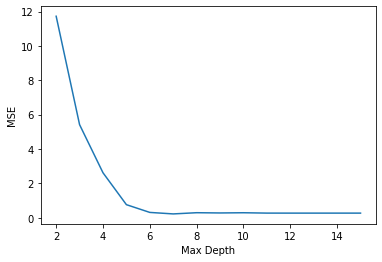

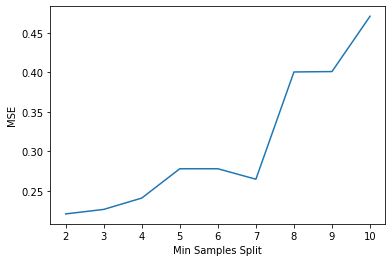

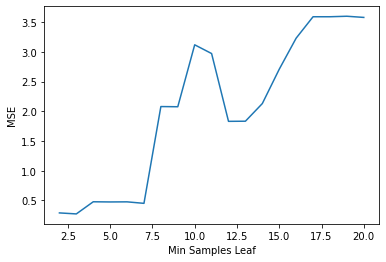

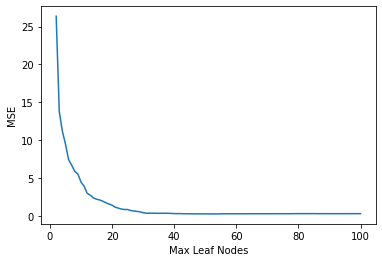

In [ ]:
best_parameters = hyper_parameter_tuning(X_train2, y_train2, X_validation2, y_validation2)

In [ ]:
parameters = ['max_depth', 'min_samples_split', 'min_samples_leaf', 'max_leaf_nodes']
print("The hyper-parameters that generalizes the tree best are: \n",parameters, "\n", best_parameters)

The hyper-parameters that generalizes the tree best are: 
 ['max_depth', 'min_samples_split', 'min_samples_leaf', 'max_leaf_nodes'] 
 [7, 2, 3, 53]


## Perform 5-fold cross-validation using the optimal hyper-parameters

In [ ]:
from sklearn.model_selection import cross_val_score
final_optimised_model =  DecisionTreeRegressor(max_depth=best_parameters[0], min_samples_split=best_parameters[1], min_samples_leaf=best_parameters[2], max_leaf_nodes=best_parameters[3], random_state=0)
final_optimised_model.fit(X_train2, y_train2)
y_pred2 = final_optimised_model.predict(X_test2)
scores = cross_val_score(final_optimised_model, X_train2, y_train2, cv=5)
print("The cross validation scores are: ", scores)

The cross validation scores are:  [0.99429468 0.99498493 0.99662754 0.99570319 0.99464184]


## Calculating the mean squared error between the predicted and the ground-truth values in the test data for the best model.

In [ ]:
from sklearn.metrics import mean_squared_error
mean_sq_error=mean_squared_error(y_test2,y_pred2)
print("The mean squared error for the best tuned model is: ", mean_sq_error)

The mean squared error for the best tuned model is:  0.28241411720280696


## Plotting the decision tree created

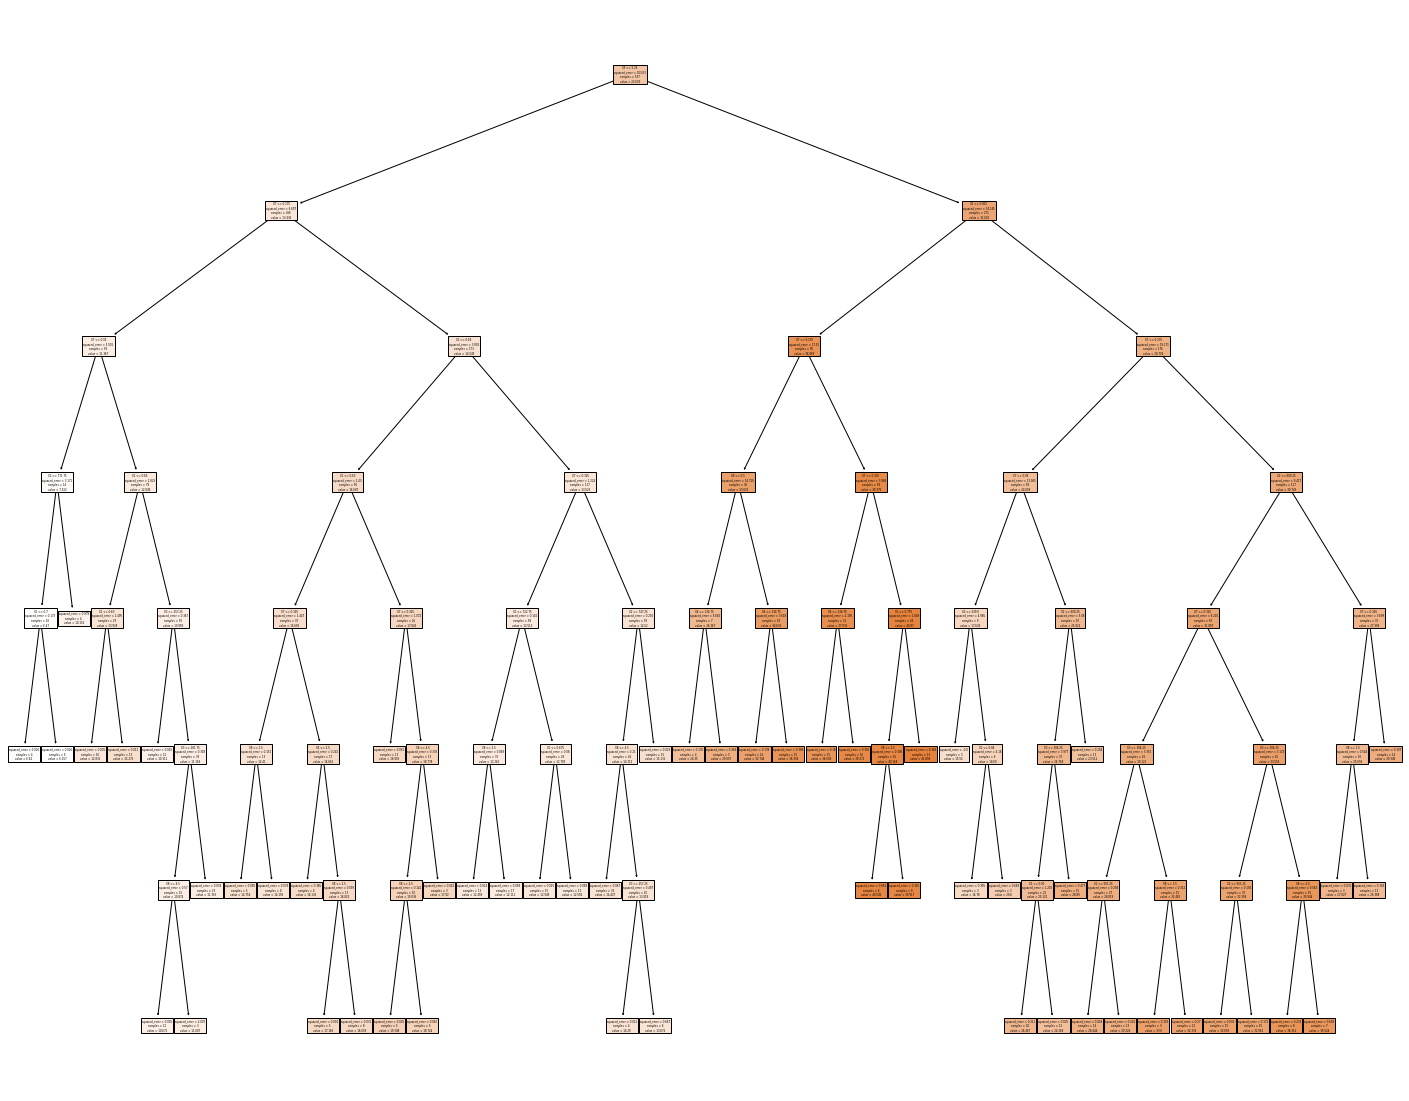

In [ ]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,20))
_ = plot_tree(final_optimised_model, feature_names=X_train2.columns, class_names=y_train2, filled=True)
plt.show()